In [1]:
import pandas as pd
import numpy as np

Reading the data

In [28]:
data = pd.read_csv('Data/judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [29]:
data.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [30]:
data.is_there_an_emotion_directed_at_a_brand_or_product.unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [31]:
data[:100]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
95,XMAS!! RT @mention Shiny new @mention @mention...,iPad,Positive emotion
96,Yai!!! RT @mention New #UberSocial for #iPhone...,iPhone,Positive emotion
97,"Yes!!! RT @mention hey @mention , i've got ano...",NaN,No emotion toward brand or product
98,"Fast, Fun &amp; Future: @mention of Google pre...",Google,Positive emotion


In [32]:
#dropping unwanted column
data.drop('emotion_in_tweet_is_directed_at',axis=1, inplace=True)

In [33]:
data

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product


In [34]:
#Preprocessing
import string
import re
import nltk

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

wordnet_lem = WordNetLemmatizer()

def remove_punctuation_of_text(text):
    punctuation_free = ''.join([i for i in text if i not in string.punctuation])
    no_links = re.sub(r'http\S+', '', punctuation_free)
    return no_links

def tokenization(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(cleaned_text)
    return tokens

stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    no_stop_words = [word for word in text if word.lower() not in stop_words]
    return no_stop_words

def lemmatized_text(text):
    lemma = [wordnet_lem.lemmatize(word) for word in text]
    return lemma

def lower_case(text):
    text_list = [item.lower() for item in text]
    return text_list

def preprocess(column):
    corpus = []
    for item in column:
        if not isinstance(item, str):
            item = str(item)
        new_item = tokenization(item)
        new_item = lower_case(new_item)
        new_item = remove_stop_words(new_item)
        new_item = lemmatized_text(new_item)
        corpus.append(new_item)
    return corpus

data['processed'] = preprocess(data['tweet_text'])


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sangeethkumarpg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sangeethkumarpg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sangeethkumarpg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
data.processed = data.processed.apply(lambda x: ' '.join(x))

### LSTM

In [36]:
data

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,processed
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,wesley g iphone hr tweeting riseaustin dead ne...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,jessedee know fludapp awesome ipadiphone app y...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,swonderlin wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,sxsw hope year festival isnt crashy year iphon...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...
...,...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion,ipad everywhere sxsw link
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product,wave buzz rt mention interrupt regularly sched...
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product,google zeiger physician never reported potenti...
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product,verizon iphone customer complained time fell b...


In [11]:
 
# data.is_there_an_emotion_directed_at_a_brand_or_product.replace({'Negative emotion':0, 'Positive emotion':1,
#        'No emotion toward brand or product':2, "I can't tell":3}, inplace=True)

In [37]:
print(data['is_there_an_emotion_directed_at_a_brand_or_product'].dtype)


object


In [13]:
#Padding and tokenizing the preprocessed text
from keras.preprocessing import text
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(list(data.processed))
tokenized_text = tokenizer.texts_to_sequences(data['processed'])
from keras.utils import pad_sequences

#Splitting to x
x = pad_sequences(tokenized_text, maxlen=100)

In [14]:
len(tokenizer.word_index)

9528

In [40]:

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#Label Ecnoding the target column
le = LabelEncoder()
encoded_labels = le.fit_transform(data.is_there_an_emotion_directed_at_a_brand_or_product)
#Converting the label encoded target column to categorical using keras to match the data type
#and splitting to y
y_encoded = to_categorical(encoded_labels, num_classes=4)
#Splitting to train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y_encoded, test_size=0.2)
     

In [99]:
#Modelling
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SimpleRNN, Dropout

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100))
model.add(LSTM(50, return_sequences=True)) 
model.add(Dropout(0.5))
model.add(LSTM(30)) 
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [100]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 128)          1219712   
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           35800     
                                                                 
 dropout_14 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_8 (LSTM)               (None, 30)                9720      
                                                                 
 dropout_15 (Dropout)        (None, 30)                0         
                                                                 
 dense_12 (Dense)            (None, 50)                1550      
                                                                 
 dropout_16 (Dropout)        (None, 50)               

In [102]:
training_history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
205/205 [==============================] - 15s 68ms/step - loss: 1.0170 - accuracy: 0.5507 - val_loss: 0.8636 - val_accuracy: 0.6140
Epoch 2/10
205/205 [==============================] - 14s 66ms/step - loss: 0.8602 - accuracy: 0.6150 - val_loss: 0.8171 - val_accuracy: 0.6442
Epoch 3/10
205/205 [==============================] - 14s 66ms/step - loss: 0.6708 - accuracy: 0.7368 - val_loss: 0.8411 - val_accuracy: 0.6758
Epoch 4/10
205/205 [==============================] - 14s 67ms/step - loss: 0.5211 - accuracy: 0.8040 - val_loss: 0.8850 - val_accuracy: 0.6868
Epoch 5/10
205/205 [==============================] - 14s 67ms/step - loss: 0.4237 - accuracy: 0.8478 - val_loss: 0.9413 - val_accuracy: 0.6841
Epoch 6/10
205/205 [==============================] - 14s 67ms/step - loss: 0.3552 - accuracy: 0.8689 - val_loss: 1.2652 - val_accuracy: 0.6745
Epoch 7/10
205/205 [==============================] - 14s 67ms/step - loss: 0.3040 - accuracy: 0.8770 - val_loss: 1.2599 - val_accuracy:

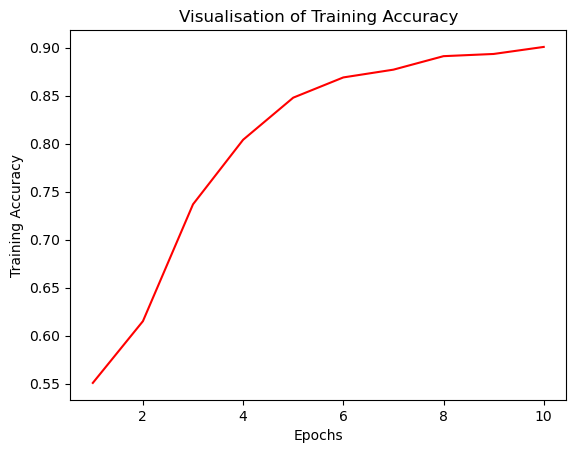

In [103]:
#Plotting the accuracy
import matplotlib.pyplot as plt
epochs = [ x for x in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Visualisation of Training Accuracy")
plt.show()

In [104]:
data.tweet_text[0]

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [105]:
#Predicting using the test set
y_preds = model.predict(x_test)

57/57 [==============================] - 1s 15ms/step


In [106]:
y_preds 

array([[8.5344666e-04, 1.6506278e-03, 9.5608896e-01, 4.1406982e-02],
       [4.6393916e-07, 2.1910937e-06, 9.9941170e-01, 5.8570784e-04],
       [8.8968815e-04, 1.3358667e-03, 6.8745780e-01, 3.1031671e-01],
       ...,
       [1.7352344e-05, 4.8100072e-05, 9.8495793e-01, 1.4976642e-02],
       [1.0492780e-04, 2.5833823e-04, 9.8528451e-01, 1.4352234e-02],
       [2.0550858e-02, 9.7171438e-01, 6.6786730e-03, 1.0561754e-03]],
      dtype=float32)

In [107]:
#Converting the probabilities to labels
y_pred_labels = np.argmax(y_preds, axis=1)

In [108]:
#Finding the actual labels label encoded target column
labels = le.inverse_transform(y_pred_labels)

In [109]:
labels

array(['No emotion toward brand or product',
       'No emotion toward brand or product',
       'No emotion toward brand or product', ...,
       'No emotion toward brand or product',
       'No emotion toward brand or product', 'Negative emotion'],
      dtype=object)

In [110]:
y_test_labels = np.argmax(y_test, axis=1)

In [111]:
#Accuracy Score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test_labels, y_pred_labels)

0.6415612974161627